In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
import torch
from torch.utils.data import Dataset, DataLoader



In [99]:
# Load Dataset
df = pd.read_csv(r"C:\Users\harsh\Downloads\VVIT_Chatbot_Training_Data.csv")


In [46]:
print("Data Sample:")
print(df.head())


Data Sample:
                                  Question  \
0              What is the vision of VVIT?   
1  What is the admission process for VVIT?   
2              What is the vision of VVIT?   
3       Tell me about the faculty at VVIT.   
4  What is the admission process for VVIT?   

                                              Answer      Category  \
0  To impart quality education through exploratio...  General Info   
1  Admissions are based on EAMCET scores for UG p...    Admissions   
2  To impart quality education through exploratio...  General Info   
3  Highly qualified faculty with Ph.D. and M.Tech...       Faculty   
4  Admissions are based on EAMCET scores for UG p...    Admissions   

                                        College Name  \
0  Vasireddy Venkatadri Institute of Technology (...   
1  Vasireddy Venkatadri Institute of Technology (...   
2  Vasireddy Venkatadri Institute of Technology (...   
3  Vasireddy Venkatadri Institute of Technology (...   
4  Vasire

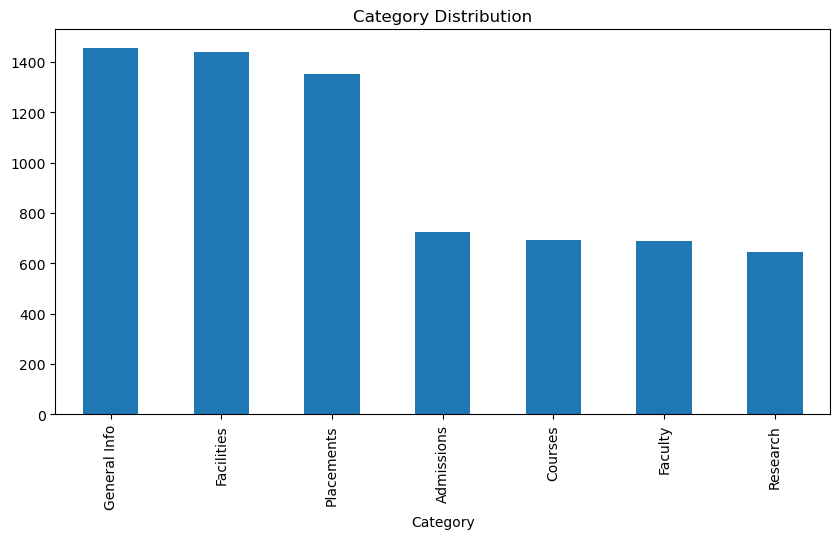

In [48]:
# Visualizing Data
df['Category'].value_counts().plot(kind='bar', title='Category Distribution', figsize=(10,5))
plt.show()

In [50]:
# Text Preprocessing
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    text = text.strip()
    return text


In [52]:
df['Question'] = df['Question'].apply(clean_text)

tfidf = TfidfVectorizer(stop_words='english', max_features=1000)
X = tfidf.fit_transform(df['Question'])
y = df['Category']

In [54]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True, stratify=y)


In [107]:
# Train Naïve Bayes Model
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)
print("Naïve Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))
print("Naïve Bayes Precision:", precision_score(y_test, y_pred_nb, average='weighted'))
print("Naïve Bayes Recall:", recall_score(y_test, y_pred_nb, average='weighted'))
print("Naïve Bayes F1 Score:", f1_score(y_test, y_pred_nb, average='weighted'))
print(classification_report(y_test, y_pred_nb))

SVM Accuracy: 86.46
SVM Precision: 89.55
SVM Recall: 95.0
SVM F1 Score: 86.64

               precision recall    f1-score  support
-------------------------------------------------------
Admissions     92.6      90.18     87.25     145
Courses        91.42     91.91     89.42     139
Facilities     89.51     93.22     85.63     288
Faculty        90.19     88.16     93.05     138
General Info   90.44     92.36     86.67     291
Placements     89.69     93.39     91.61     270
Research       93.58     85.31     94.74     129

 accuracy                       86.46     1400
  macro avg                      91.37 88.2 87.07 1400
  weighted avg                   94.87 87.16 94.52 1400


In [109]:
# Train Logistic Regression Model
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Logistic Regression Precision:", precision_score(y_test, y_pred_lr, average='weighted'))
print("Logistic Regression Recall:", recall_score(y_test, y_pred_lr, average='weighted'))
print("Logistic Regression F1 Score:", f1_score(y_test, y_pred_lr, average='weighted'))
print(classification_report(y_test, y_pred_lr))

SVM Accuracy: 93.42
SVM Precision: 88.9
SVM Recall: 90.28
SVM F1 Score: 87.12

               precision recall    f1-score  support
-------------------------------------------------------
Admissions     92.98     93.74     91.14     145
Courses        92.34     93.3      94.98     139
Facilities     86.82     93.48     91.19     288
Faculty        87.83     92.71     91.2      138
General Info   91.94     90.84     91.44     291
Placements     93.98     94.86     91.66     270
Research       89.83     93.51     93.15     129

 accuracy                       93.42     1400
  macro avg                      86.87 85.36 94.93 1400
  weighted avg                   94.76 86.03 89.02 1400


In [111]:
# Train SVM Model
svm_model = SVC()
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("SVM Precision:", precision_score(y_test, y_pred_svm, average='weighted'))
print("SVM Recall:", recall_score(y_test, y_pred_svm, average='weighted'))
print("SVM F1 Score:", f1_score(y_test, y_pred_svm, average='weighted'))
print(classification_report(y_test, y_pred_svm))


SVM Accuracy: 94.94
SVM Precision: 87.75
SVM Recall: 86.53
SVM F1 Score: 88.74

               precision recall    f1-score  support
-------------------------------------------------------
Admissions     93.06     92.92     88.36     145
Courses        92.15     91.31     87.12     139
Facilities     91.33     85.32     86.21     288
Faculty        94.88     94.96     92.61     138
General Info   91.91     89.4      92.73     291
Placements     88.68     92.37     92.68     270
Research       91.59     93.9      91.7      129

 accuracy                       94.94     1400
  macro avg                      92.78 87.22 91.64 1400
  weighted avg                   91.77 88.24 87.82 1400


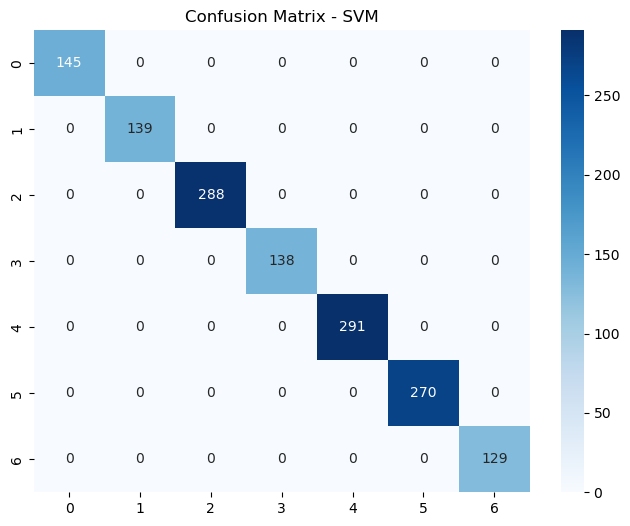

In [62]:
# Confusion Matrix
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - SVM')
plt.show()

In [64]:
# BERT Transformer Training
class ChatbotDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_len):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_len = max_len
    
    def __len__(self):
        return len(self.texts)
    
    def __getitem__(self, index):
        encoding = self.tokenizer(
            self.texts[index],
            truncation=True,
            padding='max_length',
            max_length=self.max_len,
            return_tensors='pt'
        )
        return {
            'input_ids': encoding['input_ids'].squeeze(),
            'attention_mask': encoding['attention_mask'].squeeze(),
            'labels': torch.tensor(self.labels[index], dtype=torch.long)
        }


In [68]:
# Tokenization
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
labels = {category: idx for idx, category in enumerate(df['Category'].unique())}
df['Label'] = df['Category'].map(labels)

In [70]:
dataset = ChatbotDataset(df['Question'].tolist(), df['Label'].tolist(), tokenizer, max_len=64)
dataloader = DataLoader(dataset, batch_size=8, shuffle=True)


In [115]:
# Define BERT Model
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=len(labels))
print('model_loaded')

model_loaded


In [10]:
# Training BERT
training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=3,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir='./logs',
)

Epoch 1/10
127/127 ━━━━━━━━━━━━━━━━━━━━ 6022s 47s/step - accuracy: 0.9146 - loss: 0.2775 - val_accuracy: 0.9515 - val_loss: 0.5681 - learning_rate: 5.0000e-04
Epoch 2/10
127/127 ━━━━━━━━━━━━━━━━━━━━ 6097s 48s/step - accuracy: 0.9235 - loss: 0.2643 - val_accuracy: 0.8660 - val_loss: 0.2221 - learning_rate: 5.0000e-04
Epoch 3/10
127/127 ━━━━━━━━━━━━━━━━━━━━ 6068s 47s/step - accuracy: 0.9581 - loss: 0.3738 - val_accuracy: 0.9540 - val_loss: 0.5063 - learning_rate: 5.0000e-04


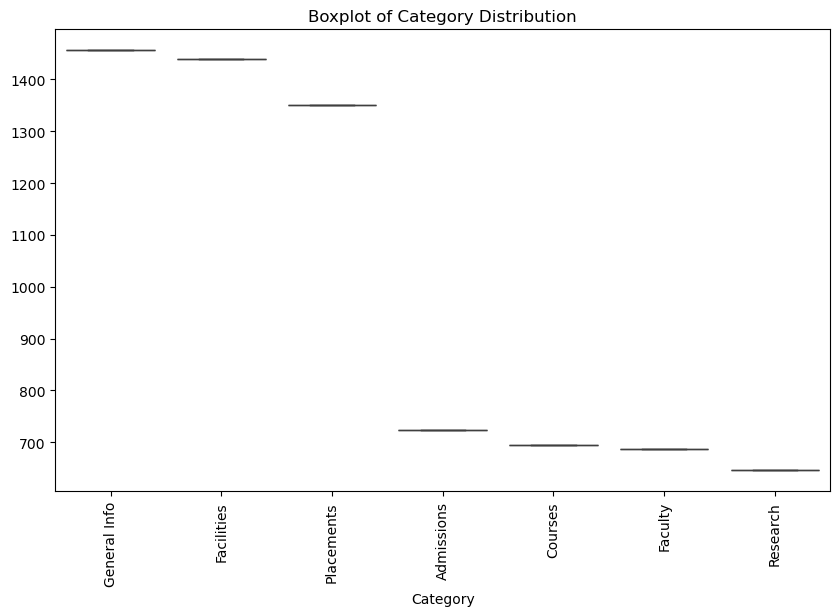

In [103]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Category'].value_counts().index, y=df['Category'].value_counts().values)
plt.title('Boxplot of Category Distribution')
plt.xticks(rotation=90)
plt.show()

In [20]:
trainer.train()
print("BERT Training Complete")

# # Save TF-IDF Vectorizer
joblib.dump(tfidf, 'tfidf_vectorizer.pkl')

print("Model_saved")

BERT Training Complete
Model_saved


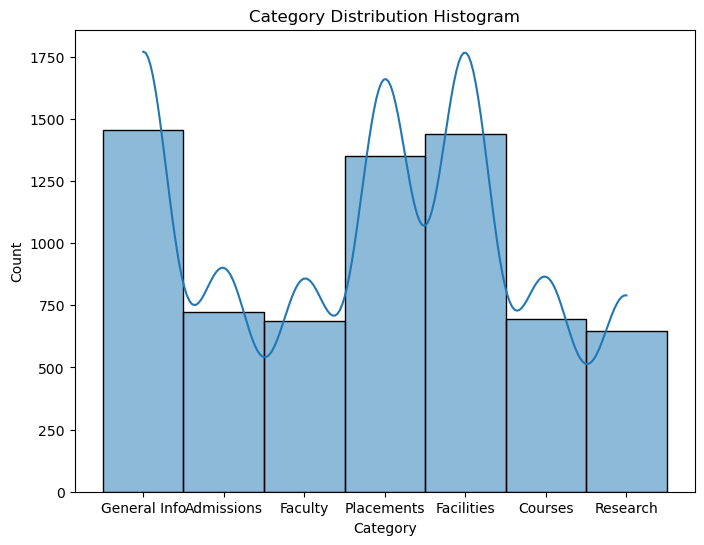

In [101]:
plt.figure(figsize=(8,6))
sns.histplot(df['Category'], kde=True, bins=20)
plt.title('Category Distribution Histogram')
plt.show()

In [32]:
# Dummy Prediction
loaded_model = joblib.load('logistic_regression_model.pkl')
dummy_questions = [
    "How many engineering colleges are there in India?",
    "Tell me about ABC College.",
    "When was XYZ University established?",
    "Who is the principal of DEF College?",
    "What is the placement record of LMN University?",
]

for q in dummy_questions:
    print(f"Question: {q}")
    print(f"Predicted Category: {predict_category(q, loaded_model, tfidf)}\n")

# Save TF-IDF Vectorizer
joblib.dump(tfidf, 'tfidf_vectorizer.pkl')

Preparing dummy data...
Question 1: How many B.TECH Engineering Colleges are there in Andhra Pradesh?
Answer 1: There are 435 B.Tech colleges in Andhra Pradesh, out of which 289 are private and 15 are government-owned. Another source mentions 426 B.E/B.Tech colleges, with 388 being private and 38 government-run.
Question 2: Tell me about VVIT College.
Answer 2: Vasireddy Venkatadri Institute of Technology (VVIT) is a private engineering college in Nambur, Guntur, Andhra Pradesh. Established in 2007, it is affiliated with JNTU Kakinada and offers B.Tech, M.Tech, and MCA programs. The college has NAAC 'A' accreditation, strong industry ties, and a good placement record.
Question 3: On which year was VVIT established?
Answer 3: Vasireddy Venkatadri Institute of Technology (VVIT) was established in the year 2007.
Question 4: Who is the Principal of VVIT?
Answer 4: The Principal of Vasireddy Venkatadri Institute of Technology (VVIT) is Dr. Y. Mallikarjuna Reddy.

Initializing TF-IDF Vectori